In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/Kelompok 3 - Data Science/Dataset/Air_Quality_New.csv')



In [ ]:
data.shape

(5325, 10)

In [ ]:
data.dtypes

tanggal      object
stasiun      object
pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
max         float64
critical     object
categori     object
dtype: object

In [ ]:
data.isnull().sum()

tanggal       0
stasiun       0
pm10        117
so2         161
co          171
o3          191
no2         232
max          29
critical     83
categori      0
dtype: int64

In [ ]:
data.describe()

,pm10,so2,co,o3,no2,max
count,5208.000000,5164.000000,5154.000000,5134.000000,5093.000000,5296.000000
mean,47.600038,20.268784,17.746799,70.810869,10.981936,74.037198
std,14.938128,11.644826,11.637738,37.231541,12.129136,35.071840
min,5.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,35.000000,13.000000,11.000000,45.000000,6.000000,53.000000
50%,45.000000,19.000000,16.000000,66.000000,9.000000,70.000000
75%,59.000000,24.000000,21.000000,89.000000,12.000000,89.000000
max,134.000000,112.000000,135.000000,243.000000,148.000000,243.000000


In [ ]:
new_data = data.dropna()
new_data

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,1/1/2018,DKI1 (Bunderan HI),35.0,20.0,22.0,27.0,2.0,35.0,PM10,BAIK
1,2/1/2018,DKI1 (Bunderan HI),35.0,18.0,12.0,17.0,1.0,18.0,SO2,BAIK
3,4/1/2018,DKI1 (Bunderan HI),35.0,21.0,20.0,19.0,2.0,24.0,PM10,BAIK
4,5/1/2018,DKI1 (Bunderan HI),35.0,19.0,17.0,21.0,2.0,23.0,PM10,BAIK
5,6/1/2018,DKI1 (Bunderan HI),35.0,19.0,14.0,24.0,2.0,24.0,O3,BAIK
...,...,...,...,...,...,...,...,...,...,...
5317,24/12/2020,DKI5 (Kebon Jeruk) Jakarta Barat,29.0,31.0,9.0,28.0,2.0,31.0,PM25,BAIK
5318,25/12/2020,DKI5 (Kebon Jeruk) Jakarta Barat,24.0,27.0,7.0,18.0,3.0,27.0,PM25,BAIK
5321,28/12/2020,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,33.0,5.0,35.0,3.0,35.0,CO,BAIK
5323,30/12/2020,DKI5 (Kebon Jeruk) Jakarta Barat,16.0,7.0,3.0,21.0,2.0,21.0,CO,BAIK


In [ ]:
new_data.describe()

,pm10,so2,co,o3,no2,max
count,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000
mean,48.161344,20.341352,17.701161,71.007881,11.099751,75.511406
std,14.974434,11.748083,11.721783,37.309821,12.403513,34.617179
min,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,35.000000,13.000000,11.000000,45.000000,6.000000,55.000000
50%,47.000000,19.000000,16.000000,66.000000,9.000000,71.000000
75%,60.000000,24.000000,21.000000,89.000000,12.000000,90.000000
max,134.000000,112.000000,135.000000,243.000000,148.000000,243.000000


Repairing Data

In [ ]:
data_2018 = new_data[new_data.tanggal.str.contains('2018')]
data_2019 = new_data[new_data.tanggal.str.contains('2019')]
data_2020 = new_data[new_data.tanggal.str.contains('2020')]

data_2018['pm10'].replace(35.0,np.NaN,inplace=True)


data_2018["pm10"] = np.where((data_2018["max"] != data_2018["so2"]) & (data_2018["max"] != data_2018["co"]) & (data_2018["max"] != data_2018["o3"]) & (data_2018["max"] != data_2018["no2"]) , data_2018['max'], np.NaN)

data_2018["critical"] = data_2018[['pm10', 'so2', 'co', 'o3', 'no2']].idxmax(axis = 1)
data_2019["critical"] = data_2019[['pm10', 'so2', 'co', 'o3', 'no2']].idxmax(axis = 1)
data_2020["critical"] = data_2020[['pm10', 'so2', 'co', 'o3', 'no2']].idxmax(axis = 1)

new_data = pd.concat([data_2018,data_2019,data_2020])

def conditions(x):
    if   x > 200:
      return "SANGAT TIDAK SEHAT"
    elif x > 100 and x <= 200:
      return "TIDAK SEHAT"
    elif x > 50 and x <= 100:
      return "SEDANG"
    elif x <= 50 :
      return "BAIK"
    else:
      return "error"

func = np.vectorize(conditions)
categori_conditional = func(new_data['max'])
new_data['categori'] = categori_conditional
new_data.dropna(inplace=True);
new_data[new_data.categori.str.contains('SANGAT TIDAK SEHAT')]



,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
2252,9/3/2019,DKI5 (Kebon Jeruk) Jakarta Barat,58.0,12.0,25.0,215.0,15.0,215.0,o3,SANGAT TIDAK SEHAT
2401,7/4/2019,DKI5 (Kebon Jeruk) Jakarta Barat,66.0,15.0,35.0,243.0,10.0,243.0,o3,SANGAT TIDAK SEHAT
2402,8/4/2019,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,13.0,18.0,235.0,10.0,235.0,o3,SANGAT TIDAK SEHAT
3024,16/8/2019,DKI5 (Kebon Jeruk) Jakarta Barat,92.0,20.0,28.0,207.0,14.0,207.0,o3,SANGAT TIDAK SEHAT
3031,23/8/2019,DKI5 (Kebon Jeruk) Jakarta Barat,69.0,19.0,15.0,201.0,9.0,201.0,o3,SANGAT TIDAK SEHAT
3324,11/10/2019,DKI5 (Kebon Jeruk) Jakarta Barat,71.0,21.0,8.0,207.0,9.0,207.0,o3,SANGAT TIDAK SEHAT
3471,7/11/2019,DKI5 (Kebon Jeruk) Jakarta Barat,58.0,24.0,8.0,209.0,11.0,209.0,o3,SANGAT TIDAK SEHAT
3473,9/11/2019,DKI5 (Kebon Jeruk) Jakarta Barat,60.0,25.0,10.0,220.0,12.0,220.0,o3,SANGAT TIDAK SEHAT


In [ ]:
new_data.describe()

,pm10,so2,co,o3,no2,max
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,55.155409,19.966227,17.830588,64.716639,11.807249,70.454970
std,14.612227,12.645732,12.507756,32.777309,13.809616,29.989063
min,5.000000,1.000000,3.000000,3.000000,1.000000,1.000000
25%,47.000000,12.000000,11.000000,43.000000,6.000000,53.000000
50%,56.000000,19.000000,16.000000,62.000000,9.000000,68.000000
75%,65.000000,24.000000,21.000000,82.000000,12.000000,84.000000
max,134.000000,112.000000,135.000000,243.000000,148.000000,243.000000


Visualizing

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
output_notebook()

group = new_data.groupby('tanggal')
y2018 = new_data[new_data.tanggal.str.contains('2018')]
y2019 = new_data[new_data.tanggal.str.contains('2019')]
y2020 = new_data[new_data.tanggal.str.contains('2020')]

DKI1_2018 = y2018[y2018.stasiun.str.contains('DKI1')]
DKI2_2018 = y2018[y2018.stasiun.str.contains('DKI2')]
DKI3_2018 = y2018[y2018.stasiun.str.contains('DKI3')]
DKI4_2018 = y2018[y2018.stasiun.str.contains('DKI4')]
DKI5_2018 = y2018[y2018.stasiun.str.contains('DKI5')]

DKI1_2019 = y2019[y2019.stasiun.str.contains('DKI1')]
DKI2_2019 = y2019[y2019.stasiun.str.contains('DKI2')]
DKI3_2019 = y2019[y2019.stasiun.str.contains('DKI3')]
DKI4_2019 = y2019[y2019.stasiun.str.contains('DKI4')]
DKI5_2019 = y2019[y2019.stasiun.str.contains('DKI5')]

DKI1_2020 = y2020[y2020.stasiun.str.contains('DKI1')]
DKI2_2020 = y2020[y2020.stasiun.str.contains('DKI2')]
DKI3_2020 = y2020[y2020.stasiun.str.contains('DKI3')]
DKI4_2020 = y2020[y2020.stasiun.str.contains('DKI4')]
DKI5_2020 = y2020[y2020.stasiun.str.contains('DKI5')]

DKIs = ['DKI1','DKI2','DKI3','DKI4','DKI5']
years = ['2018','2019','2020']

data_pm10 = {
    "DKI":DKIs,
    "2018" : [DKI1_2018.pm10.mean(),DKI2_2018.pm10.mean(),DKI3_2018.pm10.mean(),DKI4_2018.pm10.mean(),DKI5_2018.pm10.mean()],
    "2019" : [DKI1_2019.pm10.mean(),DKI2_2019.pm10.mean(),DKI3_2019.pm10.mean(),DKI4_2019.pm10.mean(),DKI5_2019.pm10.mean()],
    "2020" : [DKI1_2020.pm10.mean(),DKI2_2020.pm10.mean(),DKI3_2020.pm10.mean(),DKI4_2020.pm10.mean(),DKI5_2020.pm10.mean()],
}

x = [ (dki, year) for dki in DKIs for year in years ]

counts_pm10 = sum(zip(data_pm10['2018'], data_pm10['2019'], data_pm10['2020']), ())
source_pm10 = ColumnDataSource(data=dict(x=x, counts=counts_pm10))

p = figure(x_range=FactorRange(*x), height=250, title="Perbandingan nilai rata-rata PM10 pada tahun 2018, 2019 dan 2020 di setiap daerah",
           toolbar_location=None, tools="")
palette= ['#FFE5EC','#FFC2D1','#FFB3C6']
p.vbar(x='x', top='counts', width=0.9,line_color="white", source=source_pm10,fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None


show(p)

In [ ]:
data_so2 = {
    "DKI":DKIs,
    "2018" : [DKI1_2018.so2.mean(),DKI2_2018.so2.mean(),DKI3_2018.so2.mean(),DKI4_2018.so2.mean(),DKI5_2018.so2.mean()],
    "2019" : [DKI1_2019.so2.mean(),DKI2_2019.so2.mean(),DKI3_2019.so2.mean(),DKI4_2019.so2.mean(),DKI5_2019.so2.mean()],
    "2020" : [DKI1_2020.so2.mean(),DKI2_2020.so2.mean(),DKI3_2020.so2.mean(),DKI4_2020.so2.mean(),DKI5_2020.so2.mean()],
}


counts_so2 = sum(zip(data_so2['2018'], data_so2['2019'], data_so2['2020']), ())
source_so2 = ColumnDataSource(data=dict(x=x, counts=counts_so2))
p = figure(x_range=FactorRange(*x), height=250, title="Perbandingan nilai rata-rata SO2 pada tahun 2018, 2019 dan 2020 di setiap daerah",
           toolbar_location=None, tools="")
palette= ['#FFE5EC','#FFC2D1','#FFB3C6']
p.vbar(x='x', top='counts', width=0.9,line_color="white", source=source_so2,fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
data_co = {
    "DKI":DKIs,
    "2018" : [DKI1_2018.co.mean(),DKI2_2018.co.mean(),DKI3_2018.co.mean(),DKI4_2018.co.mean(),DKI5_2018.co.mean()],
    "2019" : [DKI1_2019.co.mean(),DKI2_2019.co.mean(),DKI3_2019.co.mean(),DKI4_2019.co.mean(),DKI5_2019.co.mean()],
    "2020" : [DKI1_2020.co.mean(),DKI2_2020.co.mean(),DKI3_2020.co.mean(),DKI4_2020.co.mean(),DKI5_2020.co.mean()],
}


counts_co = sum(zip(data_co['2018'], data_co['2019'], data_co['2020']), ())
source_co = ColumnDataSource(data=dict(x=x, counts=counts_co))
p = figure(x_range=FactorRange(*x), height=250, title="Perbandingan nilai rata-rata CO pada tahun 2018, 2019 dan 2020 di setiap daerah",
           toolbar_location=None, tools="")
palette= ['#FFE5EC','#FFC2D1','#FFB3C6']
p.vbar(x='x', top='counts', width=0.9,line_color="white", source=source_co,fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
data_o3 = {
    "DKI":DKIs,
    "2018" : [DKI1_2018.o3.mean(),DKI2_2018.o3.mean(),DKI3_2018.o3.mean(),DKI4_2018.o3.mean(),DKI5_2018.o3.mean()],
    "2019" : [DKI1_2019.o3.mean(),DKI2_2019.o3.mean(),DKI3_2019.o3.mean(),DKI4_2019.o3.mean(),DKI5_2019.o3.mean()],
    "2020" : [DKI1_2020.o3.mean(),DKI2_2020.o3.mean(),DKI3_2020.o3.mean(),DKI4_2020.o3.mean(),DKI5_2020.o3.mean()],
}


counts_o3 = sum(zip(data_o3['2018'], data_o3['2019'], data_o3['2020']), ())
source_o3 = ColumnDataSource(data=dict(x=x, counts=counts_o3))
p = figure(x_range=FactorRange(*x), height=250, title="Perbandingan nilai rata-rata O3 pada tahun 2018, 2019 dan 2020 di setiap daerah",
           toolbar_location=None, tools="")
palette= ['#FFE5EC','#FFC2D1','#FFB3C6']
p.vbar(x='x', top='counts', width=0.9,line_color="white", source=source_o3,fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [ ]:
data_no2 = {
    "DKI":DKIs,
    "2018" : [DKI1_2018.no2.mean(),DKI2_2018.no2.mean(),DKI3_2018.no2.mean(),DKI4_2018.no2.mean(),DKI5_2018.no2.mean()],
    "2019" : [DKI1_2019.no2.mean(),DKI2_2019.no2.mean(),DKI3_2019.no2.mean(),DKI4_2019.no2.mean(),DKI5_2019.no2.mean()],
    "2020" : [DKI1_2020.no2.mean(),DKI2_2020.no2.mean(),DKI3_2020.no2.mean(),DKI4_2020.no2.mean(),DKI5_2020.no2.mean()],
}


counts_no2 = sum(zip(data_no2['2018'], data_no2['2019'], data_no2['2020']), ())
source_no2 = ColumnDataSource(data=dict(x=x, counts=counts_no2))
p = figure(x_range=FactorRange(*x), height=250, title="Perbandingan nilai rata-rata NO2 pada tahun 2018, 2019 dan 2020 di setiap daerah",
           toolbar_location=None, tools="")
palette= ['#FFE5EC','#FFC2D1','#FFB3C6']
p.vbar(x='x', top='counts', width=0.9,line_color="white", source=source_no2,fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

Correlation

In [ ]:
categori_grouped=new_data.groupby(['tanggal','categori'])['max'].mean()
seperate_categori = categori_grouped.unstack(level=1)


seperate_categori.corr()

categori,BAIK,SANGAT TIDAK SEHAT,SEDANG,TIDAK SEHAT
categori,,,,
BAIK,1.000000,NaN,-0.455066,0.300456
SANGAT TIDAK SEHAT,NaN,1.000000,0.357344,0.816176
SEDANG,-0.455066,0.357344,1.000000,0.039235
TIDAK SEHAT,0.300456,0.816176,0.039235,1.000000


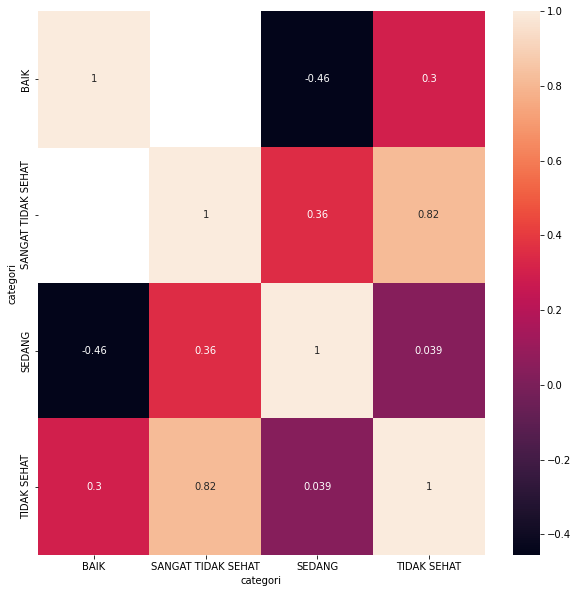

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(seperate_categori.corr(), annot =True)

In [ ]:
# categori_dictionary = {
#     "BAIK":1,
#     "SEDANG":2,
#     "TIDAK SEHAT":3,
#     "SANGAT TIDAK SEHAT":4,
# }
# critical_dictionary = {
#     "pm10":1,
#     "so2":2,
#     "co":3,
#     "o3":4,
#     "no2":5,
# }
# stasiun_dictionary = {
#     'DKI1 (Bunderan HI)':1,
#     'DKI2 (Kelapa Gading)':2,
#     'DKI3 (Jagakarsa)':3,
#     'DKI4 (Lubang Buaya)':4,
#     'DKI5 (Kebon Jeruk) Jakarta Barat':5,
#     'DKI5 (Kebon Jeruk)':5
# }
# new_data['categori'].replace(categori_dictionary,inplace=True)
# new_data['critical'].replace(critical_dictionary,inplace=True)
# new_data['stasiun'].replace(stasiun_dictionary,inplace=True)
# new_data


Data preparation

In [ ]:
new_data.drop(['tanggal'], axis=1, inplace=True)
new_data.drop(['stasiun'], axis=1, inplace=True)

Data tanggal dan stasiun tidak mempengaruhi kategori pencemaran udara, sehingga data tersebut dapat diabaikan dalam data preparation.

Categorical encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')
new_data.groupby('critical').size()
new_data = pd.get_dummies(new_data, columns = ["critical"])
new_data

,pm10,so2,co,o3,no2,max,categori,critical_co,critical_no2,critical_o3,critical_pm10,critical_so2
0,35.0,20.0,22.0,27.0,2.0,35.0,BAIK,0,0,0,1,0
3,24.0,21.0,20.0,19.0,2.0,24.0,BAIK,0,0,0,1,0
4,23.0,19.0,17.0,21.0,2.0,23.0,BAIK,0,0,0,1,0
7,48.0,27.0,19.0,44.0,3.0,48.0,BAIK,0,0,0,1,0
10,40.0,30.0,18.0,36.0,4.0,40.0,BAIK,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5317,29.0,31.0,9.0,28.0,2.0,31.0,BAIK,0,0,0,0,1
5318,24.0,27.0,7.0,18.0,3.0,27.0,BAIK,0,0,0,0,1
5321,22.0,33.0,5.0,35.0,3.0,35.0,BAIK,0,0,1,0,0
5323,16.0,7.0,3.0,21.0,2.0,21.0,BAIK,0,0,1,0,0


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = new_data[['pm10',	'so2', 'co', 'o3', 'no2', 'max', 'critical_co','critical_no2', 'critical_o3', 'critical_pm10', 'critical_so2']]
y = new_data[['categori']]

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)

column_name = list(X.columns)
new_data = pd.DataFrame(data=data_scaled, columns= column_name)
new_data.head()

,pm10,so2,co,o3,no2,max,critical_co,critical_no2,critical_o3,critical_pm10,critical_so2
0,0.232558,0.171171,0.143939,0.100000,0.006803,0.140496,0.0,0.0,0.0,1.0,0.0
1,0.147287,0.180180,0.128788,0.066667,0.006803,0.095041,0.0,0.0,0.0,1.0,0.0
2,0.139535,0.162162,0.106061,0.075000,0.006803,0.090909,0.0,0.0,0.0,1.0,0.0
3,0.333333,0.234234,0.121212,0.170833,0.013605,0.194215,0.0,0.0,0.0,1.0,0.0
4,0.271318,0.261261,0.113636,0.137500,0.020408,0.161157,0.0,0.0,0.0,1.0,0.0


Imbalance data

In [ ]:
y['categori'].value_counts()

SEDANG                2469
BAIK                   754
TIDAK SEHAT            411
SANGAT TIDAK SEHAT       8
Name: categori, dtype: int64

(array([ 754.,    0.,    0., 2469.,    0.,    0.,  411.,    0.,    0.,
           8.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

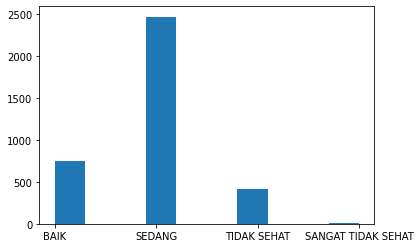

In [ ]:
plt.hist(y['categori'])

Counter({'categori': 1})


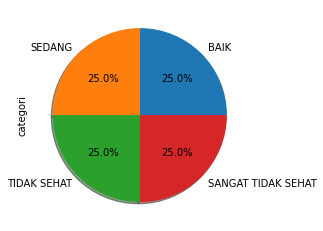

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_sm, y_sm = smote.fit_resample(X, y)

print(Counter(y_sm))
y_sm['categori'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

Split train and test data

In [ ]:
from sklearn.model_selection import train_test_split
#Split data to data train and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_test

,categori
4684,TIDAK SEHAT
5166,BAIK
3017,TIDAK SEHAT
5209,BAIK
2918,SEDANG
...,...
4612,SEDANG
3227,SEDANG
4974,BAIK
2086,SEDANG


In [ ]:
y_pred

array(['TIDAK SEHAT', 'BAIK', 'TIDAK SEHAT', ..., 'BAIK', 'SEDANG',
       'SEDANG'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm

array([[217,   0,   9,   0],
       [  0,   2,   0,   1],
       [  7,   0, 733,   1],
       [  0,   0,   9, 114]])

In [ ]:
ac

0.9752973467520586